What are the most demanded skills for the top 3 most popular data roles?

Methodology

    1. Clean-up skill column
    2. Claculate skill count based on 'job_title_short'
    3. Calculate skill percentage
    4. Plot final findings

In [35]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt
from datetime import datetime as dt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [36]:
# New DtaFrame for the job posting in the United States
df_US = df[df['job_country'] == 'United States']

# Using the explode method to broad the job skills
df_skills = df_US.explode('job_skills')

df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

# Transfer the Series to DatFrame and resetting the index name for the skills count column
df_skills_count = df_skills_count.reset_index(name='skill_count')

# Sorting the skill_count values from highest to lowest
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)


In [37]:
# Selecting the top 3 role and creating a list
job_titles  = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])

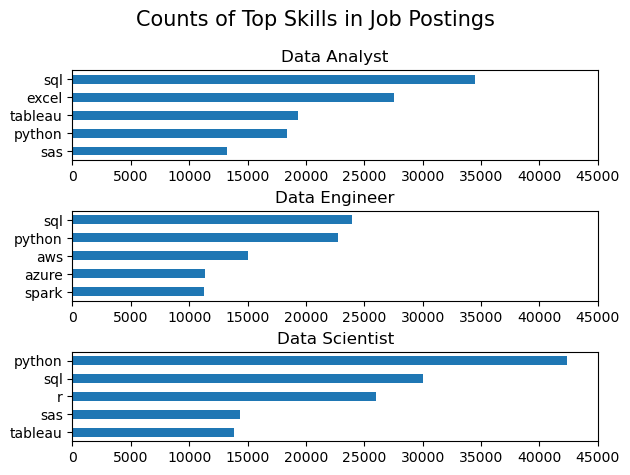

In [38]:
# Plotting the findings
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    # Plot
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    # Cleaning the Plot
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 45000)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
plt.tight_layout(h_pad=0.5)
plt.show()


In [39]:
# Calculating the percentage of the skills in each role
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [40]:
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [41]:
# We will merge two DataFrame so we can have all the data in one DataFrame
df_skills_percentage = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')
df_skills_percentage

,job_skills,job_title_short,skill_count,jobs_total
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830
...,...,...,...,...
1865,clojure,Software Engineer,1,1814
1866,vb.net,Senior Data Scientist,1,12946
1867,fortran,Machine Learning Engineer,1,921
1868,planner,Cloud Engineer,1,423


In [42]:
# Creating a new column in the DataFrame and calculate the percentage
df_skills_percentage['skill_percent'] = 100 *(df_skills_percentage['skill_count']/ df_skills_percentage['jobs_total'])
df_skills_percentage

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


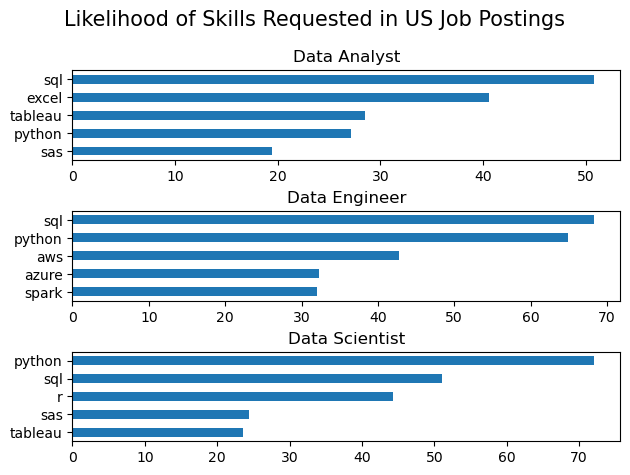

In [49]:
# Plot
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_percentage[df_skills_percentage['job_title_short'] == job_title].head(5)
    # Plot
    df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
    # Cleaning the Plot
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
plt.tight_layout(h_pad=0.5)
plt.show()

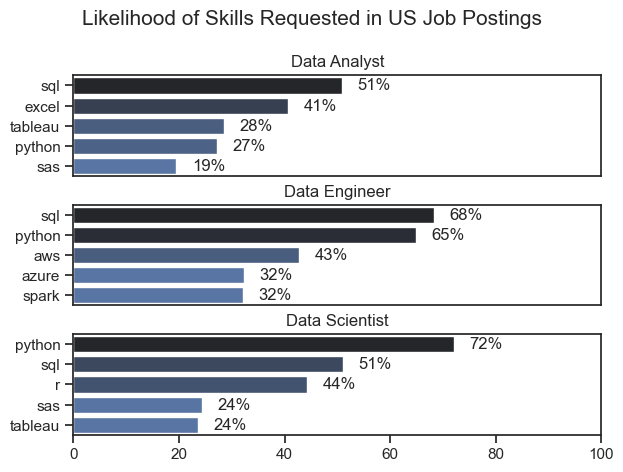

In [61]:
# Cleaning-up the Chart above
# Plot
fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_percentage[df_skills_percentage['job_title_short'] == job_title].head(5)
    # Plot
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    # Cleaning the Plot
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 100)

    # Displaying the Percentage of the skills beside the bars
    for index, value in enumerate(df_plot['skill_percent']):
        ax[i].text(value + 3, index, f'{value:.0f}%', va='center')

    # Removing the x-axis from first and second chart and only having in the last chart
    if i != len(job_titles) - 1: # Choosing the last chart
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
plt.tight_layout(h_pad=0.5)
plt.show()